In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import shap
import joblib


SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# Shap Admission

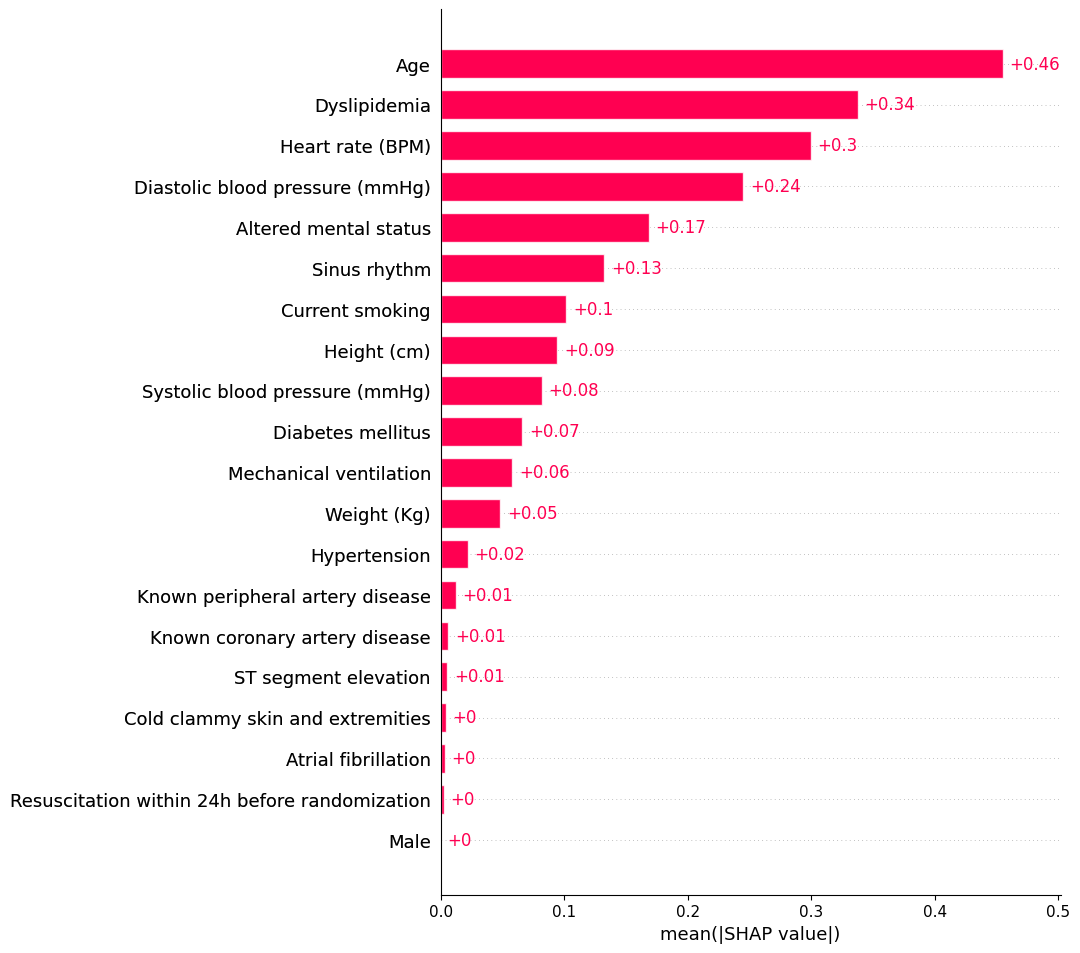

In [12]:

data_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/admission_model/shap/"
load_list = ["shap_values_Admission",
             "shap_baselineAdmission",
             "shap_dataAdmission"]
shap_dict = dict()

for file_name in load_list:
    with open(data_dir+file_name, "rb") as fp:
        shap_dict[file_name] = pickle.load(fp)
X_admission = pd.read_csv(data_dir+"X_Admission.csv",index_col=0)
Y_admission = pd.read_csv(data_dir+"Y_Admission.csv",index_col=0)
pred = pd.read_csv(data_dir+"predictions_Admission_shap.csv",index_col=0)

X_admission.rename(columns={"Age_(year)": "Age",
                            "Heart_rate_(bpm)_Hemodinamics": "Heart rate (BPM)",
                            "Diastolic_blood_pressure_(mmHg)_–_HPR":"Diastolic blood pressure (mmHg)",
                            "Height_(cm)": "Height (cm)",
                            "Weight_(kg)": "Weight (Kg)",
                            'Mechanical_ventilation':'Mechanical ventilation',
                            "Resuscitation_within_24h_before_randomization": "Resuscitation within 24h before randomization",
                            "Altered_mental_status": "Altered mental status",
                            "Cold_clammy_skin_and_extremities": "Cold clammy skin and extremities",
                            "previous_heart_complications": "Known coronary artery disease",
                            "Previous_congestive_heart_failure": "Previous congestive heart failure",
                            "Previous_stroke": "Previous stroke",
                            "Known_peripheral_artery_disease": "Known peripheral artery disease",
                            "Known_renal_insufficiency_(GFR_less_30_ml/min)": "Known renal insufficiency",
                            "Chronic_dialysis":"Chronic dialysis",
                            "Current_smoking": "Current smoking",
                            "Diabetes_mellitus": "Diabetes mellitus",
                            "Sinus_rhythm": "Sinus rhythm",
                            "Atrial_fibrillation": "Atrial fibrillation",
                            "AV-block_III": "AV block III",
                            'ST-segment_elevation':'ST segment elevation',
                            'Systolic_blood_pressure_(mmHg)_–_HPR':'Systolic blood pressure (mmHg)'}, inplace=True)


model = joblib.load(data_dir+"model_Admission_shap_values.pkl")

explainer = shap.Explainer(model)
shap_values = explainer(X_admission)

plt.figure(figsize=[15,10])
shap_values.values = shap_dict["shap_values_Admission"]
shap_values.baseline = shap_dict["shap_baselineAdmission"]
shap_values.data = shap_dict["shap_dataAdmission"]
shap.plots.bar(shap_values, max_display=28)

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
shap.plots.bar(shap_values, max_display=13)


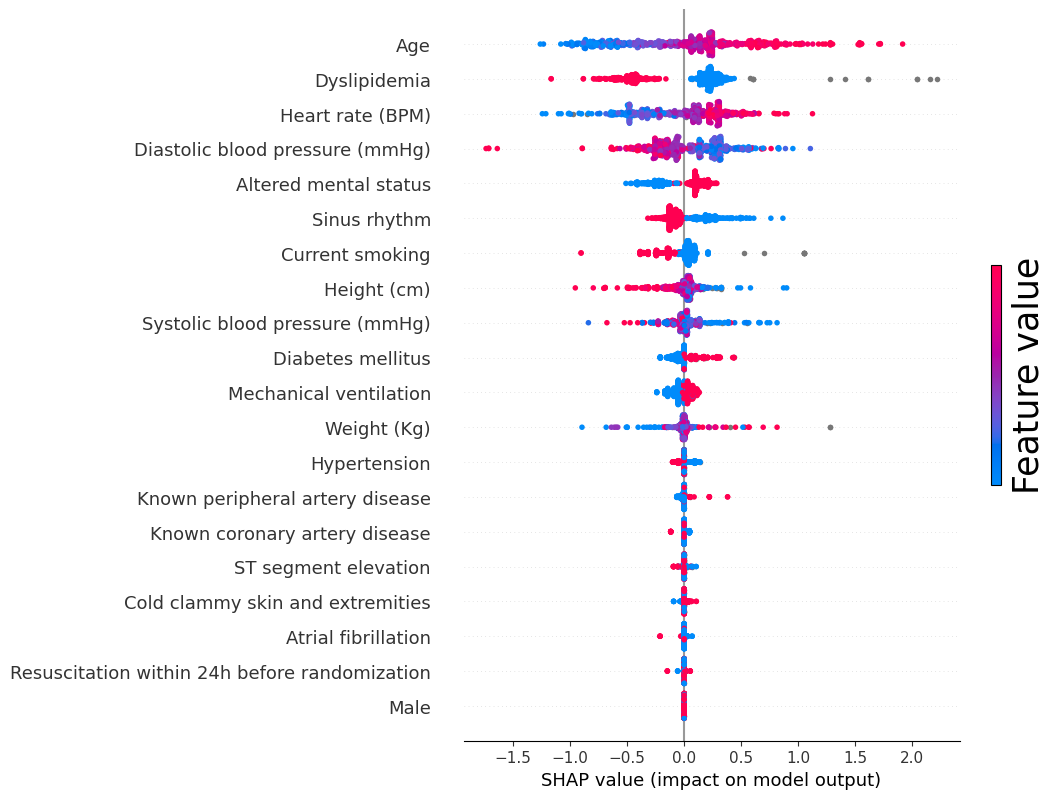

In [13]:
shap.plots.beeswarm(shap_values, color_bar=False, max_display=20,show=False)
plt.colorbar(location="right",label="Feature value", ticks=[], shrink=0.3)

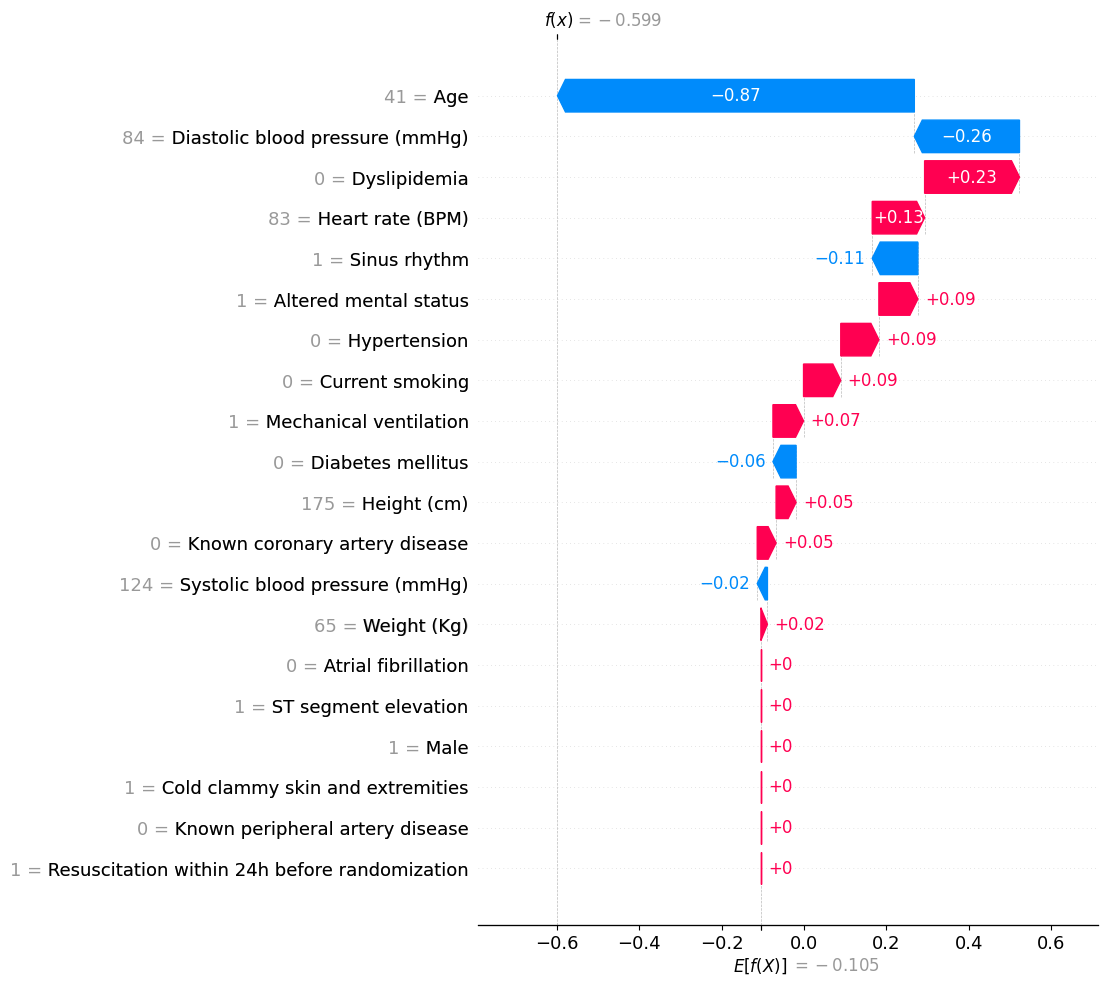

In [16]:
shap.plots.waterfall(shap_values[11], max_display=89)


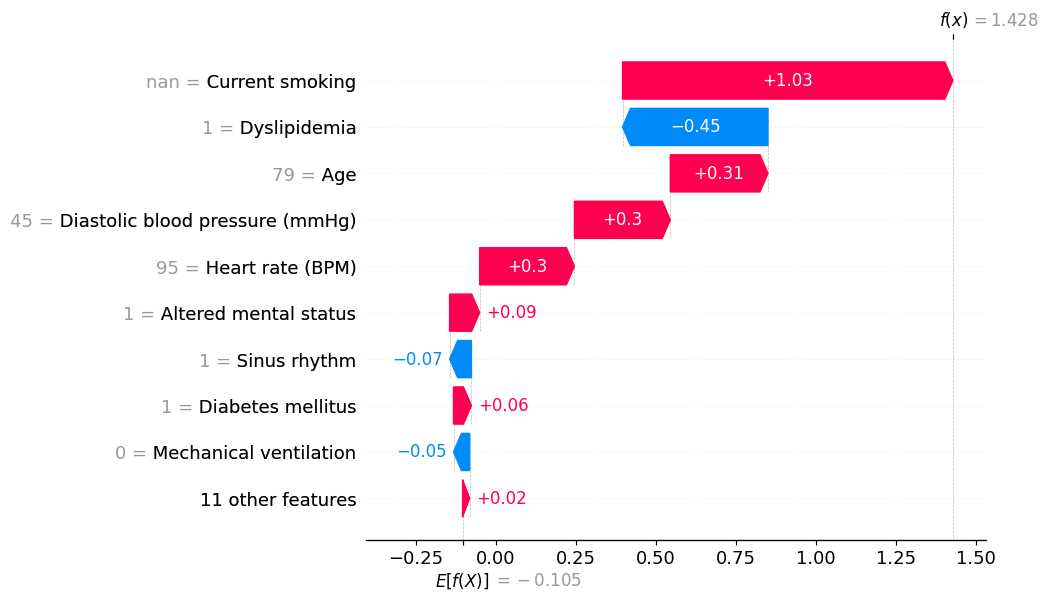

In [ ]:
shap.plots.waterfall(shap_values[122])


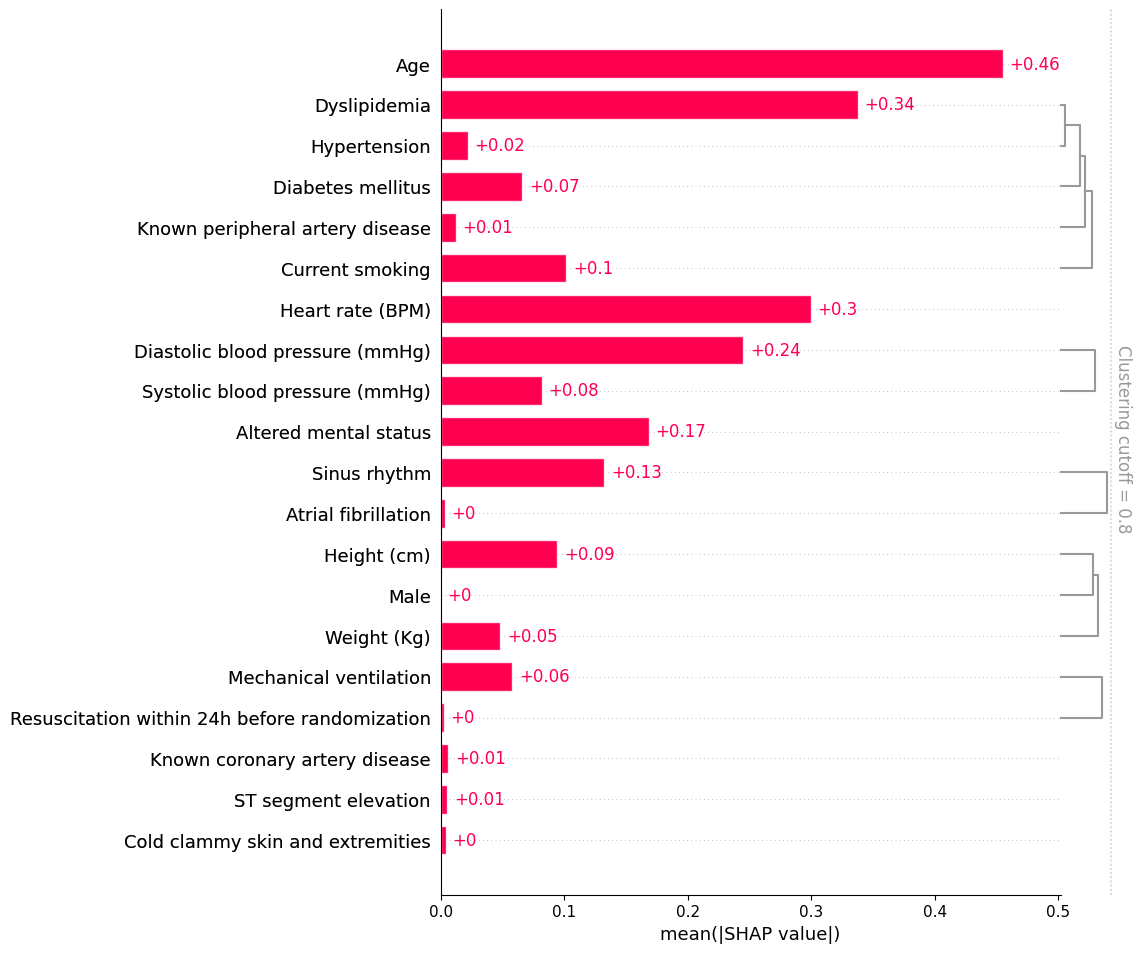

In [19]:
clustering = shap.utils.hclust(X_admission, Y_admission)
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=0.8,  max_display=20)

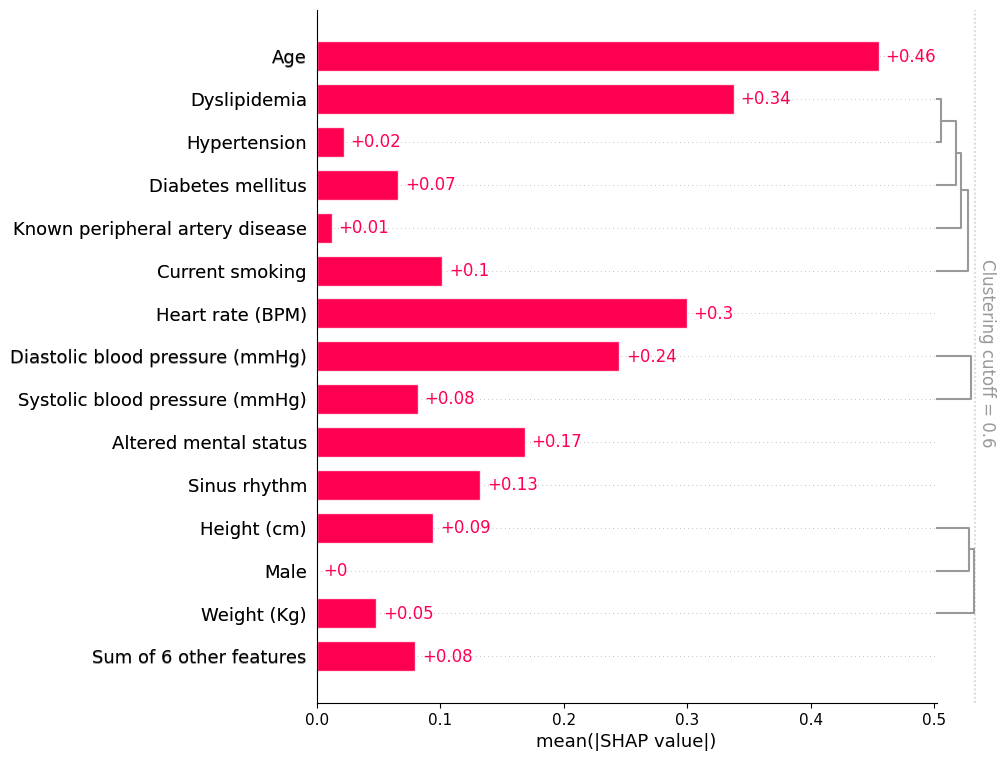

In [ ]:

shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=0.6,  max_display=15)

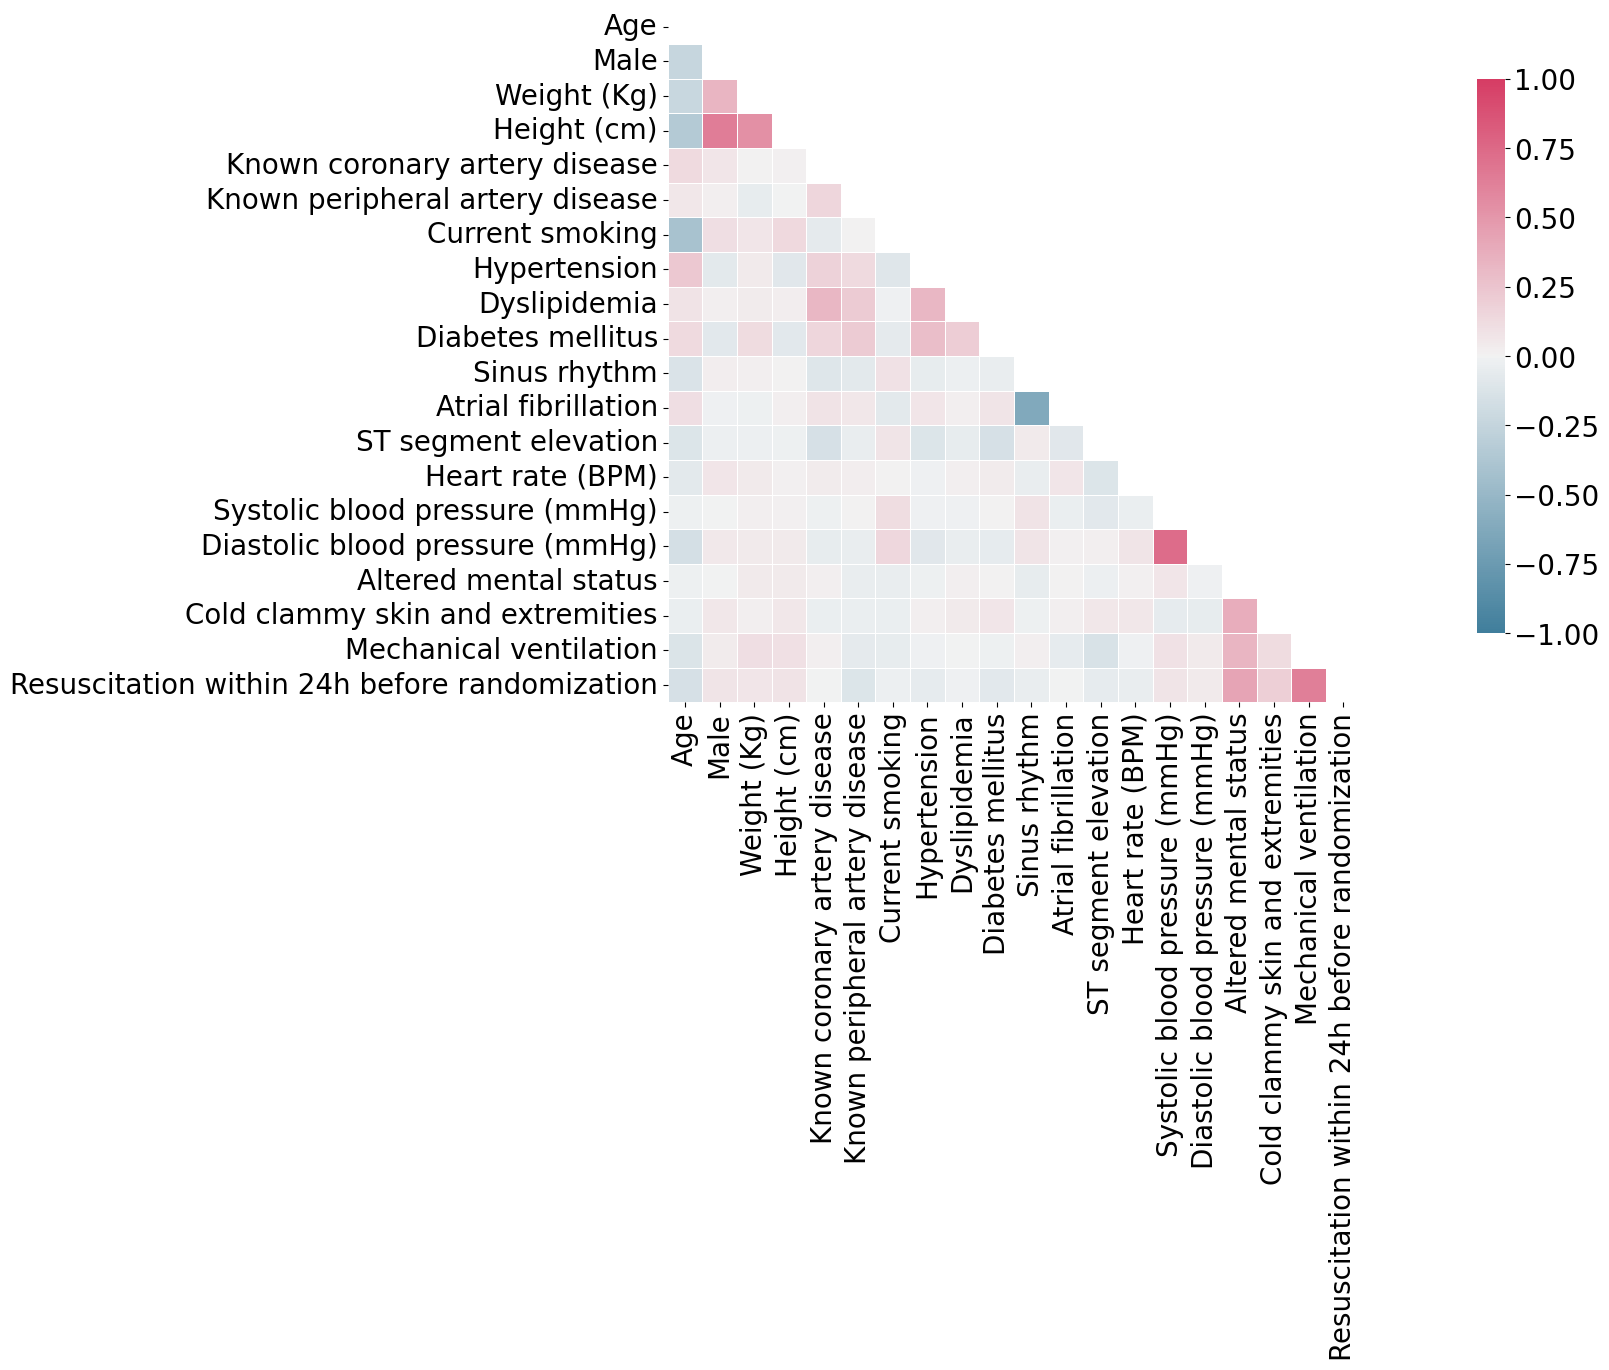

In [ ]:
X_admission_2 = X_admission.copy()
X_admission_2["Male"] = Y_admission
corr = X_admission.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 9))
# Generate a diverging colormap
cmap = sns.diverging_palette(230, 2, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .8}, annot=False, fmt=".1f")
plt.show()

# Shap on Full model

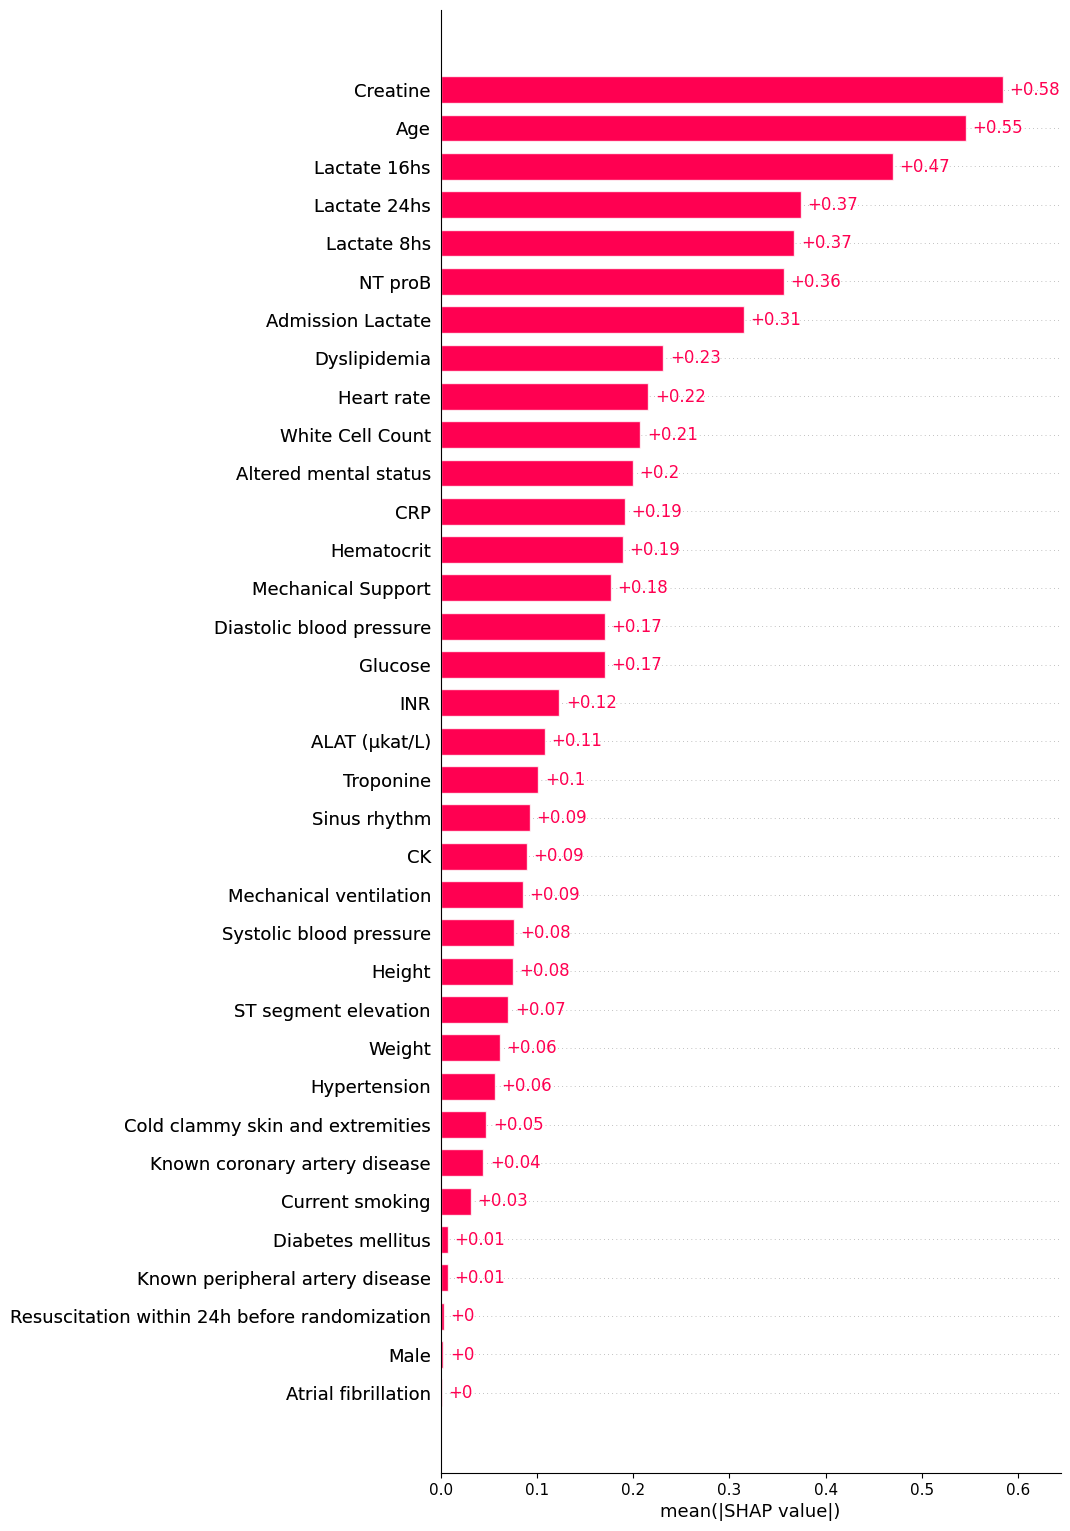

In [2]:
data_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/full_model/shap/"
load_list = ["shap_24hs_values",
             "shap_24hs_baseline",
             "shap_24hs_data"]
shap_dict = dict()

for file_name in load_list:
    with open(data_dir+file_name, "rb") as fp:
        shap_dict[file_name] = pickle.load(fp)
X_24 = pd.read_csv(data_dir+"X_24hs_v2.csv",index_col=0)
y_24 = pd.read_csv(data_dir+"Y_24hs.csv",index_col=0) 

X_24.rename(columns={"Age_(year)": "Age",
                    "Heart_rate_(bpm)_Hemodinamics": "Heart rate",
                    "Diastolic_blood_pressure_(mmHg)_–_HPR":"Diastolic blood pressure",
                    "Height_(cm)": "Height",
                    "Weight_(kg)": "Weight",
                    'Mechanical_ventilation':'Mechanical ventilation',
                    "Resuscitation_within_24h_before_randomization": "Resuscitation within 24h before randomization",
                    "Altered_mental_status": "Altered mental status",
                    "Cold_clammy_skin_and_extremities": "Cold clammy skin and extremities",
                    "previous_heart_complications": "Known coronary artery disease",
                    "Previous_congestive_heart_failure": "Previous congestive heart failure",
                    "Previous_stroke": "Previous stroke",
                    "Known_peripheral_artery_disease": "Known peripheral artery disease",
                    "Known_renal_insufficiency_(GFR_less_30_ml/min)": "Known renal insufficiency",
                    "Chronic_dialysis":"Chronic dialysis",
                    "Current_smoking": "Current smoking",
                    "Diabetes_mellitus": "Diabetes mellitus",
                    "Sinus_rhythm": "Sinus rhythm",
                    "Atrial_fibrillation": "Atrial fibrillation",
                    "AV-block_III": "AV block III",
                    'ST-segment_elevation':'ST segment elevation',
                    'Systolic_blood_pressure_(mmHg)_–_HPR':'Systolic blood pressure',
                    "Mechanical_Support":"Mechanical Support",
                    "Mild_induced_Hypothermia":"Mild induced Hypothermia",
                    "Renal_Replacement_Therapy":"Renal Replacement Therapy",
                    "Pre_PCI_Serum_lactate_value": "Pre PCI Lactate",
                    "Post_PCI_Serum_lactate_value": "Post PCI Lactate",
                    "Serum_lactate_value_8": "Lactate 8hs",
                    "Serum_lactate_value_16": "Lactate 16hs",
                    "Serum_lactate_value_24": "Lactate 24hs",
                    "No_reflow": "No reflow",
                    "Hematocrit_in_%": "Hematocrit",
                    "White_blood_cell_count_in_Gpt/L": "White blood cell count",
                    "HS_Troponin_I": "HS Troponin I",
                    "Procedural_success_(TIMI3_or_successful_complete_revascularization)": "Procedural success",
                    "ALAT_in_µkat/l": "ALAT (µkat/L)",
                    "GFR_CKD-EPI_creatinine_equation_V1_in_ml/min/1.73m²": "GFR Creatinine",
                    "NT_pro_B-type_natriuretic_peptide_V1_in_pg/ml": "NT proB",
                    "creatine": "Creatine",
                    "admission_lactate": "Admission Lactate",
                    "hematocrit": "Hematocrit",
                    "glucose": "Glucose",
                    "white_cell_count": "White Cell Count",
                    "resusitation_24hs": "Resucitation within 24hs",
                    "hs-Troponine_T_V1_in_pg/ml": "Troponine",
                    "C_Reaktive_Protein_V1_in_mg/l": "CRP",
                    "ALAT [µkat/L]": "ALAT"}, inplace=True)


model = joblib.load(data_dir+"model_24hs_v2_shap_values.pkl")

explainer = shap.Explainer(model)
shap_values = explainer(X_24)

shap_values.values = shap_dict["shap_24hs_values"]
shap_values.baseline = shap_dict["shap_24hs_baseline"]
shap_values.data = shap_dict["shap_24hs_data"]
shap.plots.bar(shap_values, max_display=50)


In [3]:
clustering = shap.utils.hclust(X_24, y_24)


/home/nnieto/Nico/MODS_project/Heart_env/lib/python3.9/site-packages/shap/utils/_clustering.py:126: UserWarning: No/low signal found from feature 4 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
  warnings.warn(f"No/low signal found from feature {i} (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).")
/home/nnieto/Nico/MODS_project/Heart_env/lib/python3.9/site-packages/shap/utils/_clustering.py:126: UserWarning: No/low signal found from feature 7 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
  warnings.warn(f"No/low signal found from feature {i} (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).")


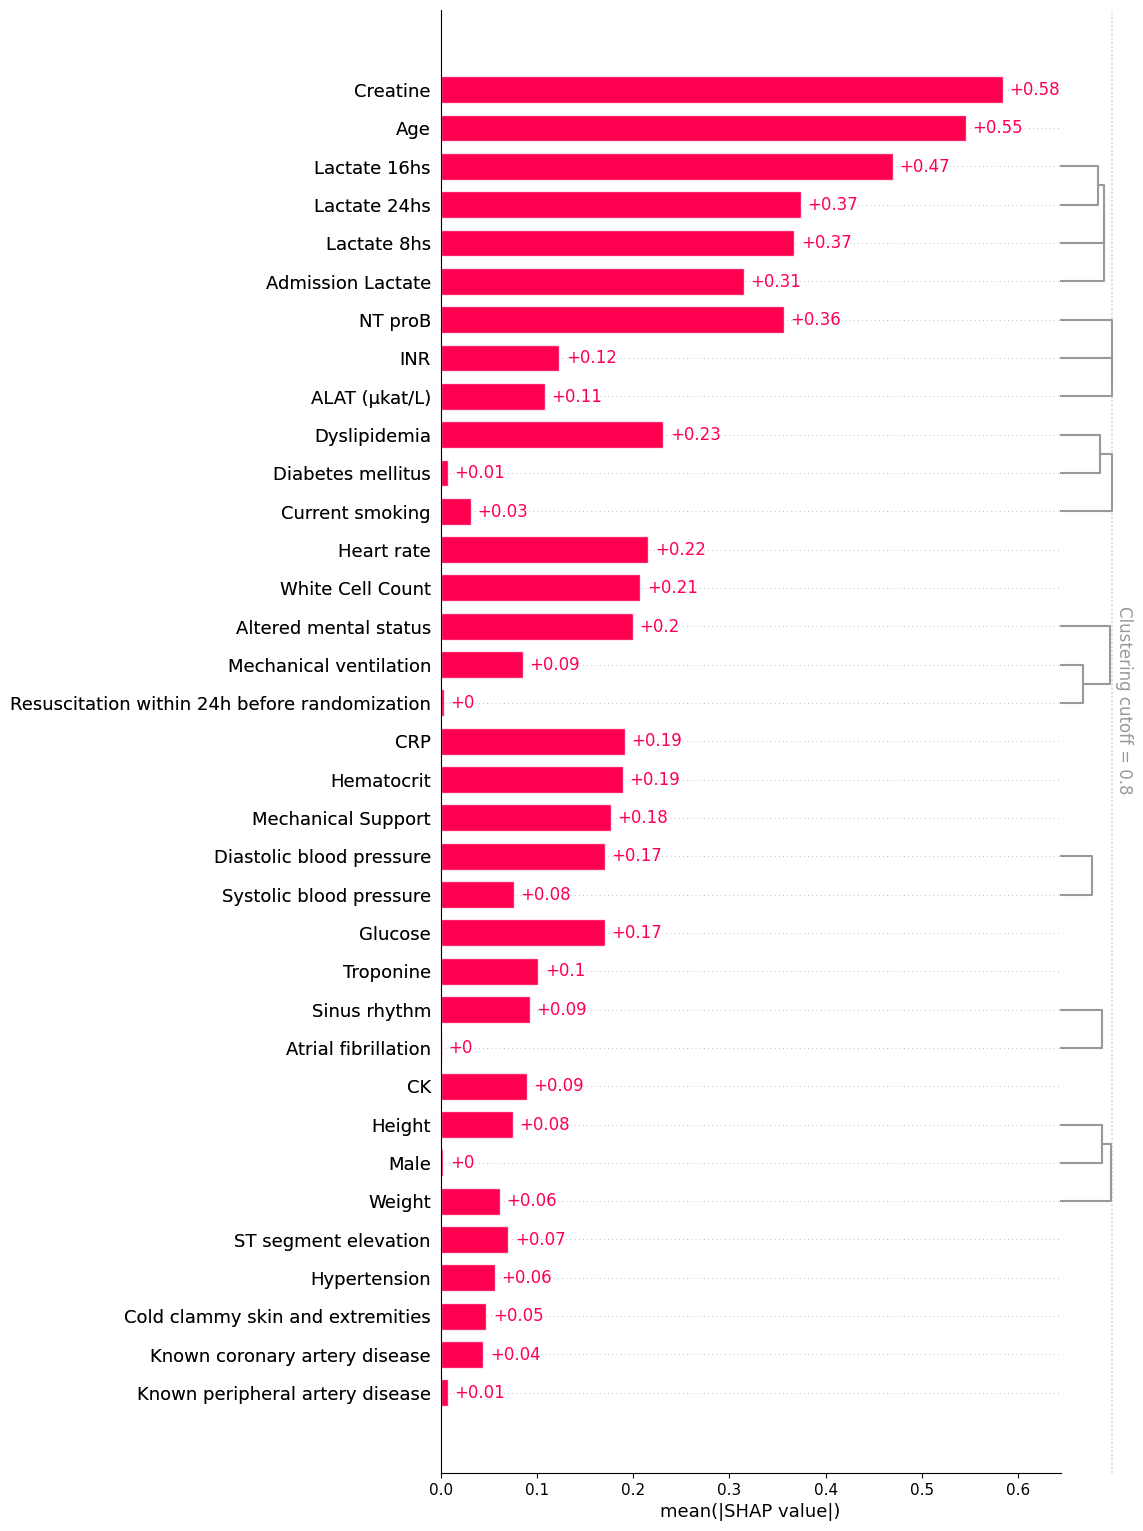

In [8]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=0.8,  max_display=35)

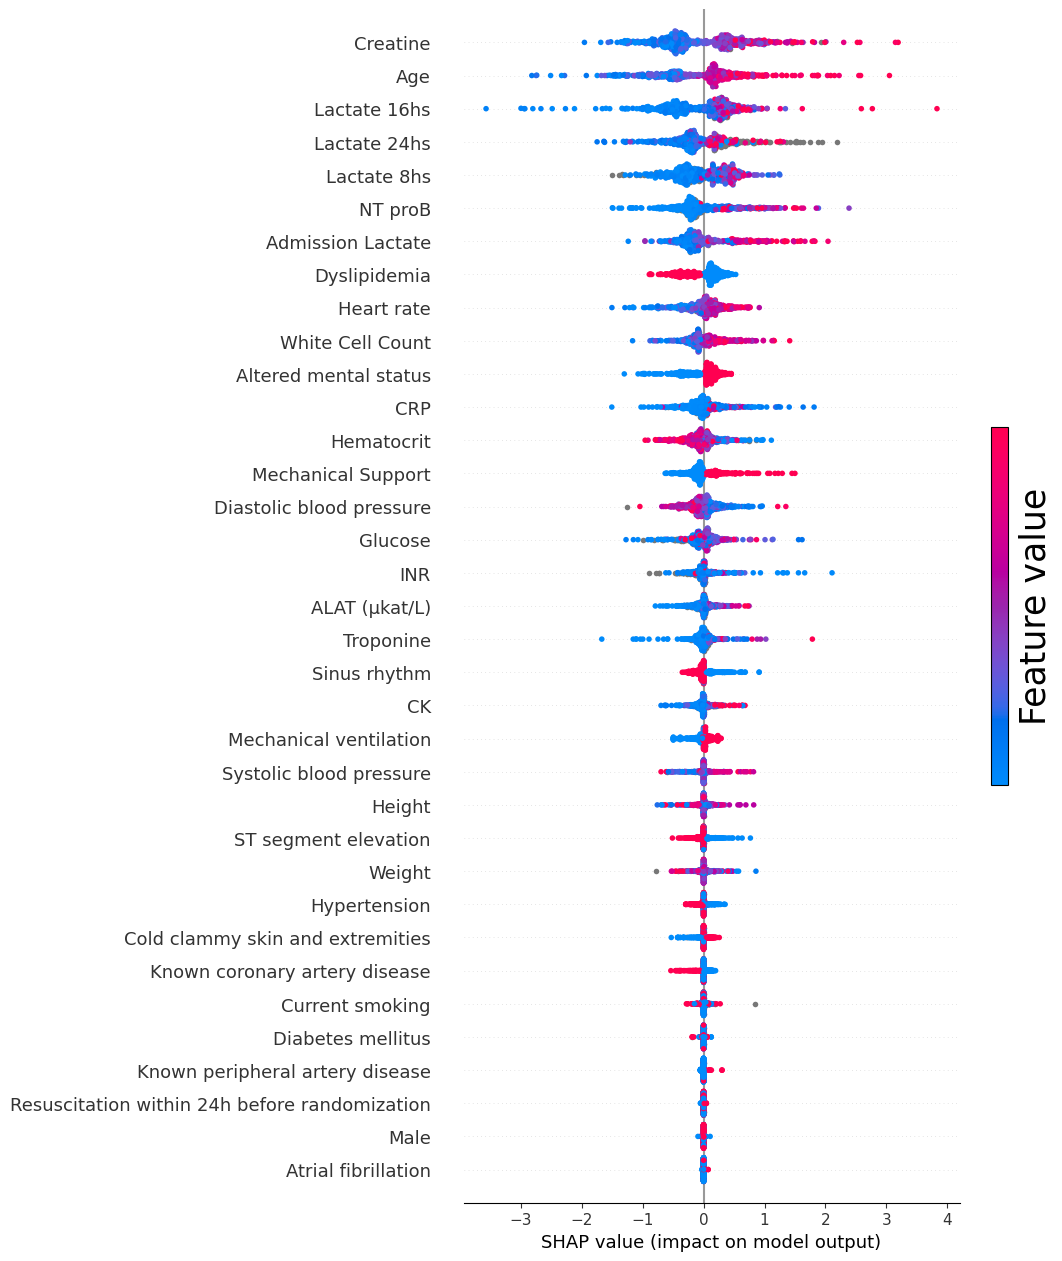

In [11]:
shap.plots.beeswarm(shap_values, color_bar=False, max_display=35,show=False)
plt.colorbar(location="right",label="Feature value", ticks=[], shrink=0.3)

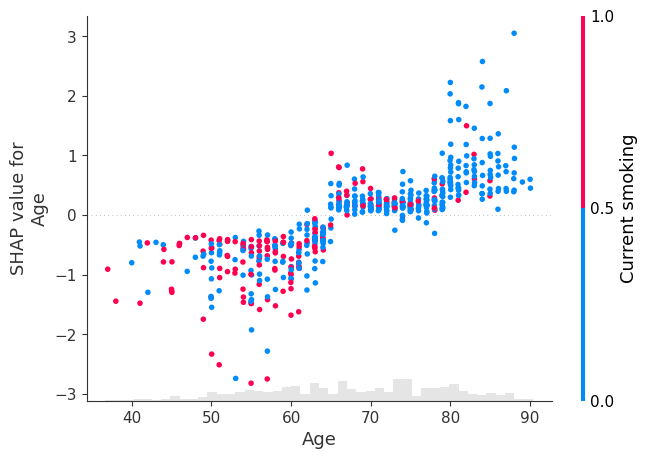

In [ ]:
shap.plots.scatter(shap_values[:, "Age"], color=shap_values[:, "Current smoking"], show=False)
